In [3]:
#import necessary library
import numpy as np 
import pandas as pd
import scipy
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("SOCR-HeightWeight.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


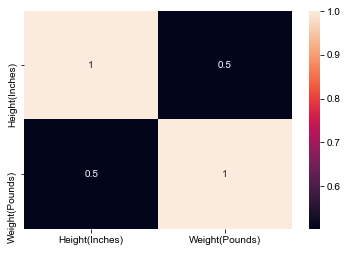

In [5]:
import seaborn as sns;
dff = df [['Height(Inches)', 'Weight(Pounds)']]
# Visualize the data using a heatmap
sns.heatmap (dff.corr(), annot = True) 
sns.set (rc = {'figure.figsize':(40, 40)})

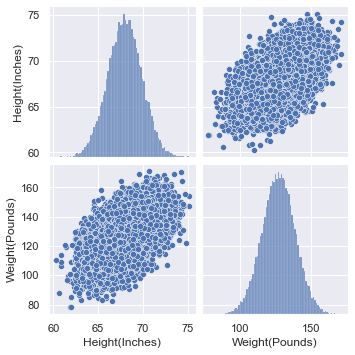

In [6]:
sns.pairplot(df[['Height(Inches)','Weight(Pounds)']])

In [7]:
df.drop('Index',axis=1,inplace=True)

In [10]:
df.head(25000)

,Height(Inches),Weight(Pounds)
13971,60.27836,110.11380
2651,60.61265,88.04646
20608,60.80620,113.91450
5641,60.86340,106.19390
12031,60.86977,108.86330
...,...,...
15209,74.59993,147.03720
13681,74.74047,155.54620
16752,74.84890,122.16640
2481,75.11519,153.95620


In [11]:
df = df.sort_values (by=['Height(Inches)','Weight(Pounds)'])
print (df)

       Height(Inches)  Weight(Pounds)
13971        60.27836       110.11380
2651         60.61265        88.04646
20608        60.80620       113.91450
5641         60.86340       106.19390
12031        60.86977       108.86330
...               ...             ...
15209        74.59993       147.03720
13681        74.74047       155.54620
16752        74.84890       122.16640
2481         75.11519       153.95620
1893         75.15280       146.97010

[25000 rows x 2 columns]


In [12]:
df = df.drop_duplicates(keep=False)
print(df)

       Height(Inches)  Weight(Pounds)
13971        60.27836       110.11380
2651         60.61265        88.04646
20608        60.80620       113.91450
5641         60.86340       106.19390
12031        60.86977       108.86330
...               ...             ...
15209        74.59993       147.03720
13681        74.74047       155.54620
16752        74.84890       122.16640
2481         75.11519       153.95620
1893         75.15280       146.97010

[25000 rows x 2 columns]


In [13]:
#Preprocssing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 13971 to 1893
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 585.9 KB


In [14]:
df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [15]:
df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [16]:
#Preprocessing Using MIN-MAX Scaling
array = df.values
X = array[:,0:8]
Y = array[:,:8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.    0.345]
 [0.022 0.108]
 [0.035 0.386]
 [0.039 0.303]
 [0.04  0.332]]


In [17]:
 rescaledX= scaler.transform(df)

In [18]:
#Extract necessary features.
data_x = df.iloc[:,0]
data_y = df.iloc[:,1]
data_x, data_y

(13971    60.27836
 2651     60.61265
 20608    60.80620
 5641     60.86340
 12031    60.86977
            ...   
 15209    74.59993
 13681    74.74047
 16752    74.84890
 2481     75.11519
 1893     75.15280
 Name: Height(Inches), Length: 25000, dtype: float64,
 13971    110.11380
 2651      88.04646
 20608    113.91450
 5641     106.19390
 12031    108.86330
            ...    
 15209    147.03720
 13681    155.54620
 16752    122.16640
 2481     153.95620
 1893     146.97010
 Name: Weight(Pounds), Length: 25000, dtype: float64)

In [19]:
#  Create the PCA object with 2 Components
A = PCA (n_components = 2)
A.fit(rescaledX)

PCA(n_components=2)

In [20]:
# Check the dimensions of data after PCA
print(rescaledX.shape)

(25000, 2)


In [21]:
#  Print all the PCA components of the dataset
print(rescaledX)

[[0.    0.345]
 [0.022 0.108]
 [0.035 0.386]
 ...
 [0.98  0.475]
 [0.997 0.817]
 [1.    0.742]]


Text(0, 0.5, 'Count')

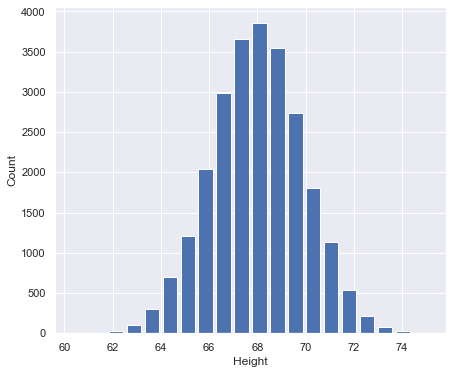

In [22]:
plt.figure(figsize=(7,6))
plt.hist(df['Height(Inches)'], bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height(Inches)', ylabel='Weight(Pounds)'>

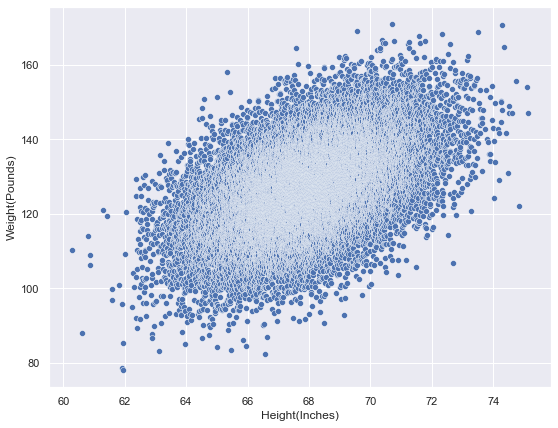

In [23]:
plt.figure(figsize=(9,7))
sns.scatterplot(df['Height(Inches)'], df['Weight(Pounds)'])

In [24]:
Height=df['Height(Inches)']
Weight=df['Weight(Pounds)']

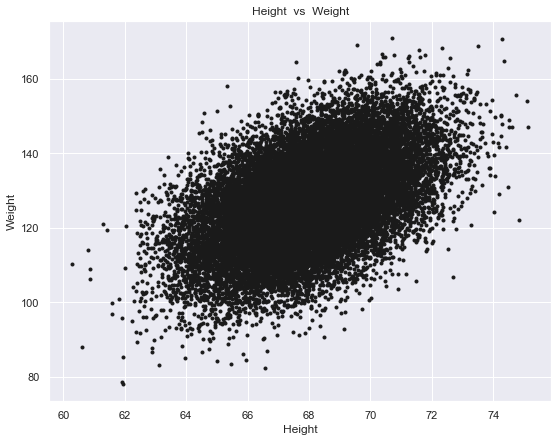

In [25]:
plt.figure(figsize=(9,7))
plt.plot(Height,Weight,".k")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("Height  vs  Weight")
plt.show()

In [26]:
#predict by the Height 
X=df[['Height(Inches)']]
y=df[['Weight(Pounds)']]

In [27]:
H =df.iloc[:,0].values
w =df.iloc[:,1:2].values

In [28]:
#Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [29]:
Model_reg = LinearRegression()
#Fit Regression Model
Model_reg.fit(X_train,y_train)

LinearRegression()

In [30]:
Model_predict = Model_reg.predict(X_test)
predict_new = Model_reg.predict([[60]])

In [31]:
print('IF a person has Height 60 , The predicted weight is :', predict_new)

IF a person has Height 60 , The predicted weight is : [[102.48]]


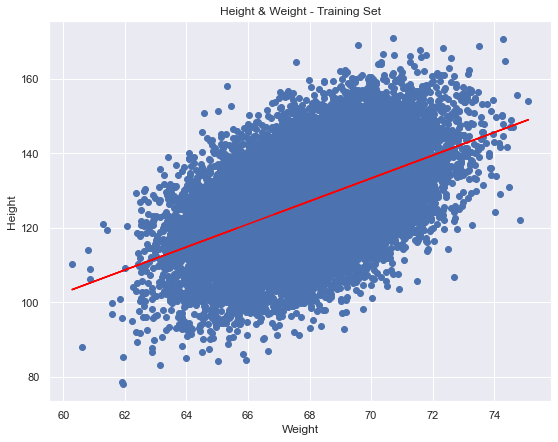

In [32]:
plt.figure(figsize=(9,7))
plt.scatter(X_train, y_train, cmap="viridis")
plt.plot(X_train, Model_reg.predict(X_train), color="red" )
plt.title("Height & Weight - Training Set")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [33]:
# Display the Residual Sum of Squares value: 

Residual_Sum_Square = np.sum((w - Model_reg.predict(H.reshape(-1,1))) ** 2) 
print('Residual Sum of Square is {0}'.format(Residual_Sum_Square))

Residual Sum of Square is 2539717.008948044


In [34]:
#Variance : How much far the data is spreaded
mean = lambda x: sum(x)/len(x)
mean_x = mean(H) 
var = sum([(z-mean_x)**2 for z in H])/(len(H)-1) 
print("Variance is : " , (var))


Variance is :  3.6163821488540733


In [38]:
# Covariance : How much two variable changes together
mean_y = mean(w)
cov = sum([np.dot((np.array(H)-mean_x),(np.array(w)-mean_y))])/(len(data_x)-1)
print("Covariance is : " , (cov)) 


Covariance is :  [11.151]


In [40]:
#Beta and Alpha calculation
Beta = cov/var
Alpha = mean_y - Beta*mean_x
Beta , Alpha

(array([3.083]), array([-82.576]))

In [41]:
#testing with the predicted data
#prediction = Alpha + Beta*x
output = Alpha + Beta*H
print('Output is {0}'.format(output))

Output is [103.291 104.322 104.919 ... 148.219 149.04  149.156]


In [42]:
# Model Evaluationusing R squarred score
SStot = sum((np.array(w) - mean_y)**2)
SSres = sum((np.array(Model_reg.predict(H.reshape(-1,1))) - w)**2)
R_Square = 1- (SSres/SStot)
print('R_Square is {0}'.format(R_Square))

R_Square is [0.253]
